In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [6]:
df = pd.read_csv('data_cleaned.csv')

In [7]:
df.head()

,Country,Theft,Fraud,Drugs,Burglary,Serious assault,Sexual violence,Robbery,Acts against computer systems,Corruption,Sexual exploitation,Money laundering,Attempted intentional homicide,Participation in an organized criminal group,Intentional homicide,Kidnapping,Total Crimes,Unemployment Rate,GDP
0,Sweden,2784.26,2701.06,1158.39,703.48,46.37,217.72,70.34,111.43,205.03,59.75,90.08,9.57,0.00,1.09,0.00,8158.57,6.5,6.368562e+11
1,Denmark,2134.02,925.06,490.85,521.11,32.26,108.61,22.04,0.00,81.80,36.39,20.33,2.28,0.00,0.72,0.00,4375.47,3.6,3.983033e+11
2,Finland,2242.66,853.02,505.80,114.66,30.05,90.64,34.19,35.64,66.86,13.82,10.75,6.76,0.05,1.70,0.04,4006.64,5.2,2.963876e+11
3,Belgium,1428.70,811.55,480.49,392.89,502.93,84.37,99.05,73.64,40.73,24.35,47.94,8.94,4.23,1.26,0.00,4001.07,3.8,5.943520e+11
4,France,1786.35,345.47,426.74,398.23,522.86,109.71,82.96,23.70,4.04,18.38,2.82,5.03,3.21,1.08,0.00,3730.58,4.9,2.957880e+12


In [8]:
# Summary 
summary_stats = df[['Total Crimes', 'Unemployment Rate']].describe()

# Print summary statistics
print(summary_stats)

       Total Crimes  Unemployment Rate
count     26.000000          26.000000
mean    2015.705769           4.319231
std     1749.893268           1.816154
min      351.700000           1.900000
25%      849.605000           3.125000
50%     1386.845000           4.250000
75%     2919.275000           5.075000
max     8158.570000           9.600000


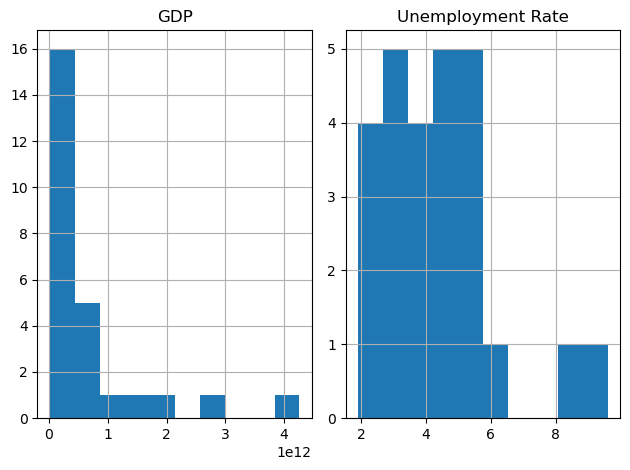

In [9]:
# histogram
df[['GDP', 'Unemployment Rate']].hist(bins=10)
plt.tight_layout()
plt.show()



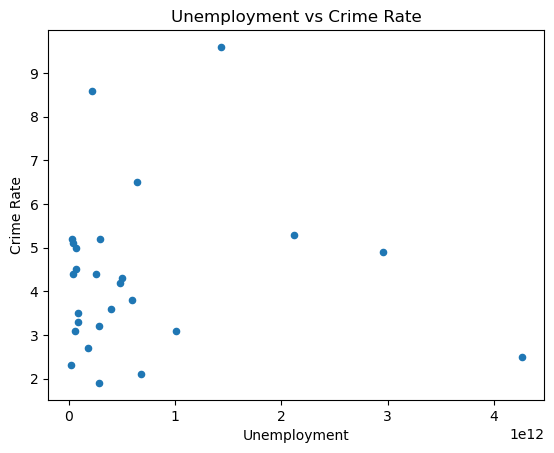

In [12]:
#scatterplot
df.plot.scatter(x='GDP', y='Unemployment Rate')
plt.xlabel('Unemployment')
plt.ylabel('Crime Rate')
plt.title('Unemployment vs Crime Rate')
plt.show()

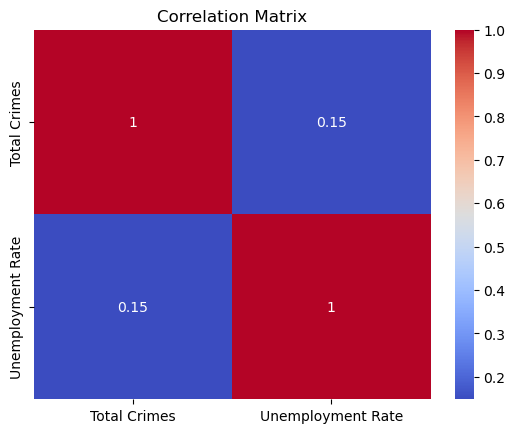

In [14]:
# correlation matrix
correlation_matrix = df[['Total Crimes', 'Unemployment Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
#regression model
# Define the dependent variable and independent variables
y = df['Total Crimes']
X = df[['Unemployment Rate']]

# Add a constant column to the independent variables
X = sm.add_constant(X)

# Create the regression model
model = sm.OLS(y, X)

# Fit the regression model
results = model.fit()

# Get the regression coefficients, p-values, standard errors, and other relevant statistics
coefficients = results.params
p_values = results.pvalues
standard_errors = results.bse

# Assess the goodness-of-fit of the regression model
r_squared = results.rsquared
adjusted_r_squared = results.rsquared_adj
f_statistic = results.fvalue

In [16]:
print("Regression Coefficients:")
print(coefficients)
print("P-values:")
print(p_values)
print("Standard Errors:")
print(standard_errors)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)
print("F-statistic:", f_statistic)

Regression Coefficients:
const                1398.665879
Unemployment Rate     142.858746
dtype: float64
P-values:
const                0.136844
Unemployment Rate    0.469772
dtype: float64
Standard Errors:
const                908.712396
Unemployment Rate    194.503028
dtype: float64
R-squared: 0.021983452136031256
Adjusted R-squared: -0.01876723735830077
F-statistic: 0.5394620903062002


In [ ]:
    Regression Coefficients: The coefficient for the Unemployment Rate is 142.858746. This indicates that, on average, a one-unit increase in the Unemployment Rate is associated with an increase of approximately 142.86 in the crime rate. However, it's important to note that this coefficient is not statistically significant at the chosen significance level (p-value = 0.469772).

    P-value: The p-value for the coefficient of the Unemployment Rate is 0.469772, which is higher than the typical significance level of 0.05. This suggests that there is not strong statistical evidence to support a significant relationship between the Unemployment Rate and the crime rate.

    R-squared: The R-squared value is 0.021983452136031256, indicating that approximately 2.20% of the variance in the crime rate is explained by the independent variables included in the model. This means that other factors not included in the model may have a more significant influence on the crime rate.

    Adjusted R-squared: The adjusted R-squared value is -0.01876723735830077, which is lower than the R-squared value. This suggests that the inclusion of the Unemployment Rate in the model may not contribute much to the explanation of the crime rate.

    F-statistic: The F-statistic is 0.5394620903062002, which tests the overall significance of the regression model. In this case, the F-statistic is relatively low, suggesting that the overall model is not statistically significant.

Based on these results, there is weak evidence to suggest a significant relationship between the Unemployment Rate and the crime rate. The coefficient for the Unemployment Rate is not statistically significant, and the inclusion of the Unemployment Rate in the model does not contribute much to the explanation of the crime rate. Other factors or variables not considered in this model may have a stronger influence on the crime rate.

It's important to interpret these results cautiously and consider other factors that may affect the relationship between the Unemployment Rate and the crime rate. Additional analyses and considerations, such as control variables or exploring different functional forms of the relationship, may provide further insights.